# Indentifying Missing Data Using the Missingno Python Library

In [1]:
!pip install missingno


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import missingno as msno

In [5]:
tree_census = pd.read_csv('../../datasets/2015StreetTreesCensus_TREES.csv')
tree_census

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25,0,OnCurb,Alive,Good,Quercus palustris,...,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.636255
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7,0,OnCurb,Alive,Good,Cladrastis kentukea,...,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.647547
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12,0,OnCurb,Alive,Good,Acer rubrum,...,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.076270
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9,0,OnCurb,Alive,Good,Acer rubrum,...,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.950653


In [6]:
tree_census_subset = tree_census[['tree_id','tree_dbh',
       'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trnk_wire', 'trnk_light', 'trnk_other',
       'brnch_ligh', 'brnch_shoe', 'brnch_othe']]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,...,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,...,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,...,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,...,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,...,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,...,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,...,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,...,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,...,None,No,No,No,No,No,No,No,No,No


In [7]:
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


In [8]:
tree_census_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tree_id     683788 non-null  int64 
 1   tree_dbh    683788 non-null  int64 
 2   stump_diam  683788 non-null  int64 
 3   curb_loc    683788 non-null  object
 4   status      683788 non-null  object
 5   health      652172 non-null  object
 6   spc_latin   652169 non-null  object
 7   spc_common  652169 non-null  object
 8   steward     652173 non-null  object
 9   guards      652172 non-null  object
 10  sidewalk    652172 non-null  object
 11  user_type   683788 non-null  object
 12  problems    652124 non-null  object
 13  root_stone  683788 non-null  object
 14  root_grate  683788 non-null  object
 15  root_other  683788 non-null  object
 16  trnk_wire   683788 non-null  object
 17  trnk_light  683788 non-null  object
 18  trnk_other  683788 non-null  object
 19  brnch_ligh  683788 non-

In [9]:
tree_census_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
user_type         0
problems      31664
root_stone        0
root_grate        0
root_other        0
trnk_wire         0
trnk_light        0
trnk_other        0
brnch_ligh        0
brnch_shoe        0
brnch_othe        0
dtype: int64

## Using Missingno

<AxesSubplot:>

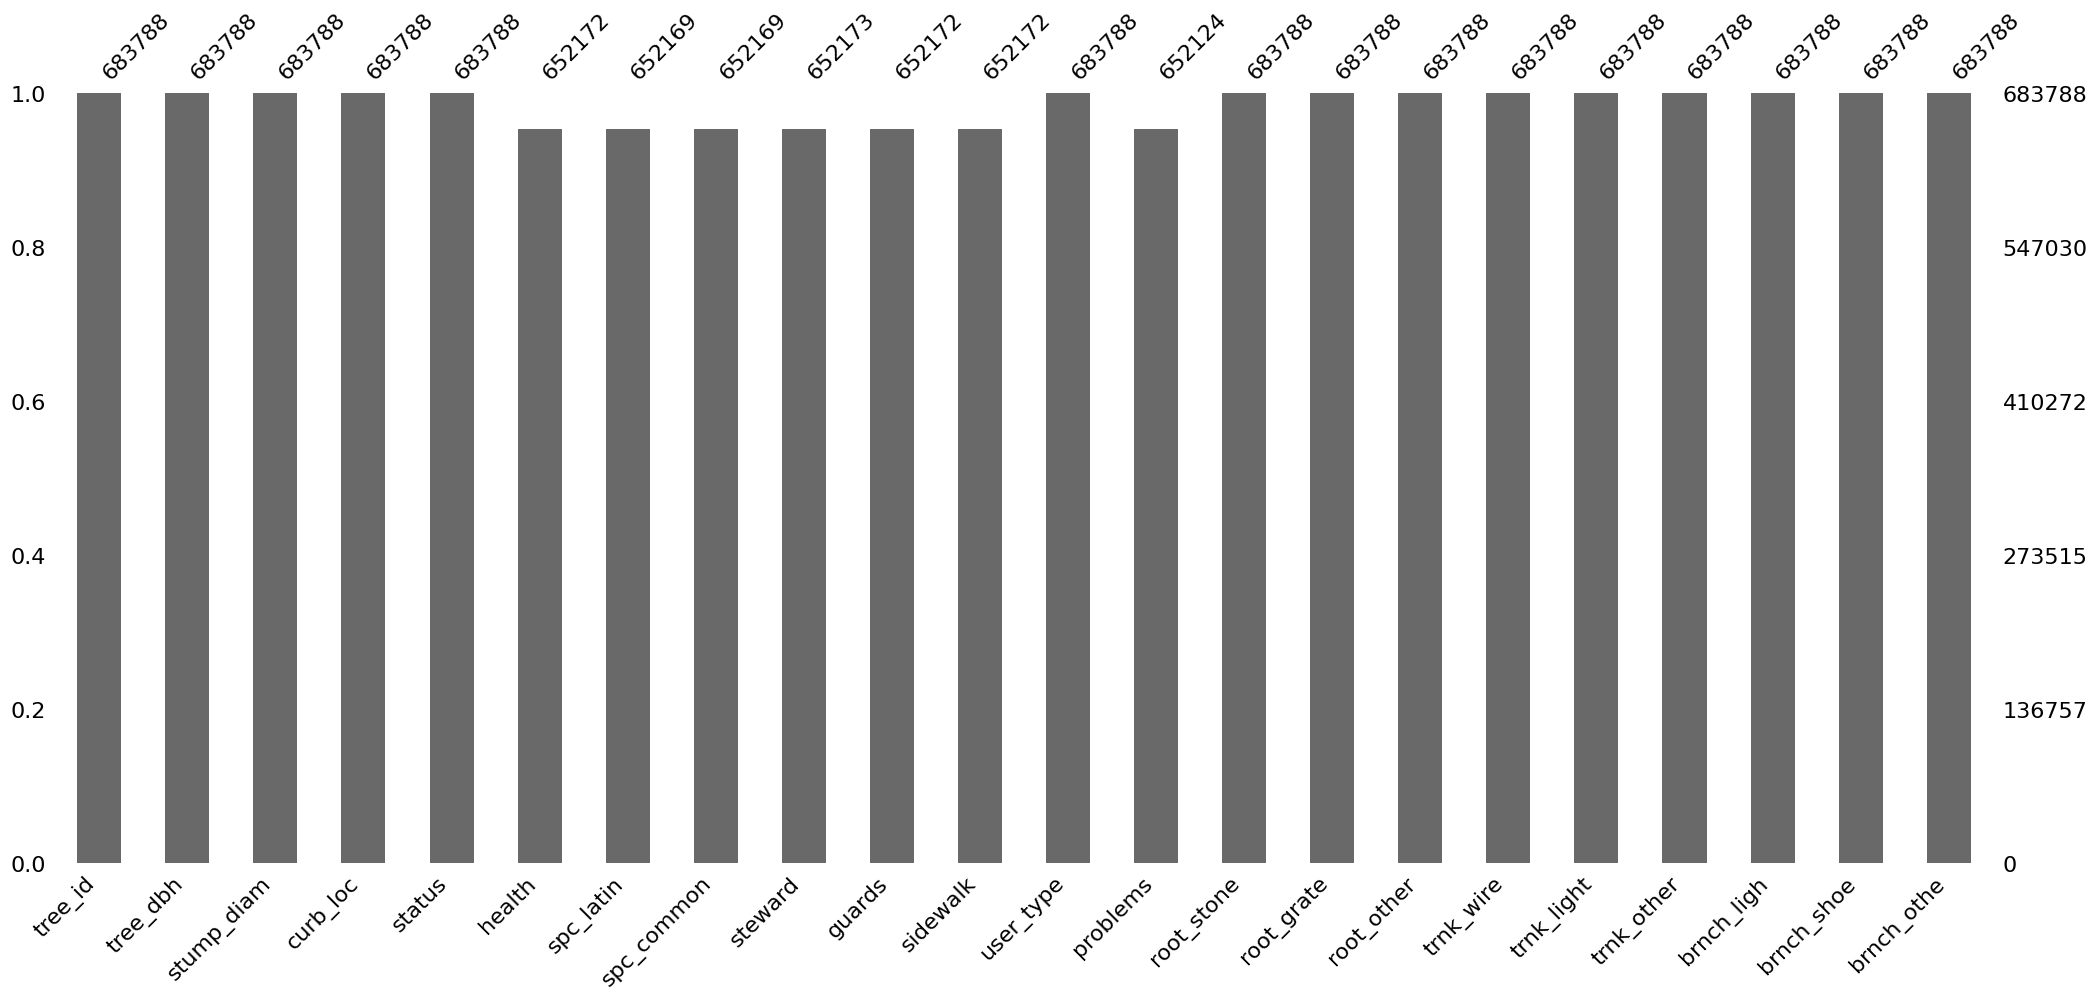

In [10]:
# Bar chart
msno.bar(tree_census_subset)

<AxesSubplot:>

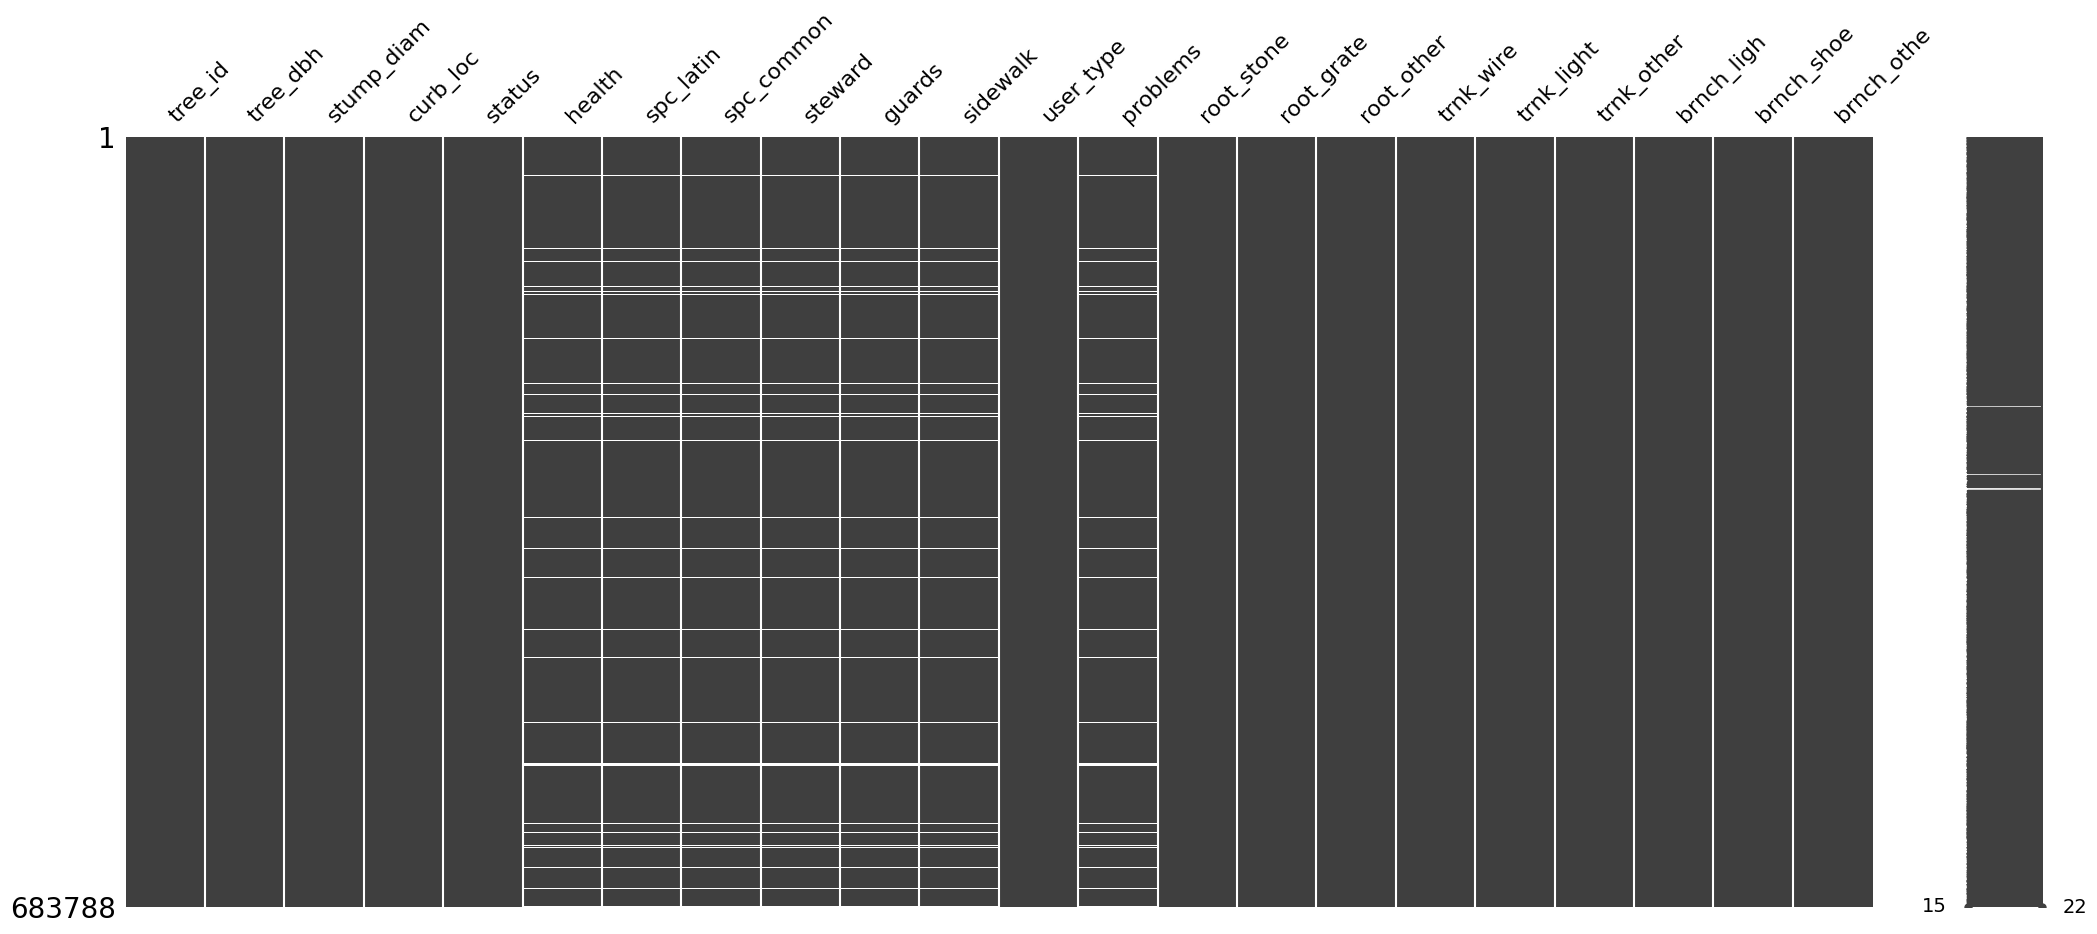

In [11]:
# Matrix Chart
msno.matrix(tree_census_subset)

In [ ]:
# Heatmap
msno.heatmap(tree_census_subset)

In [ ]:
# Dendorogram
msno.dendrogram(tree_census_subset)